# EXAMEN FINAL MINERIA DE DATOS 

## PREGUNTA NUMERO 1

Cargamos las librerias requeridas para el análisis

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Librerias para graficar 
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.font_manager
from matplotlib import style


import plotly.graph_objs as go
!pip install hypertools
import hypertools as hyp
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
datos = pd.read_csv("/content/spambase.csv")
datos.head()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1.1- Reduccion de dimensión.

In [5]:
datos.columns

Index(['make', 'address', 'all', 'W_3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will ', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you ', 'credit', 'your', 'font', 'W_000',
       'money', 'hp', 'hpl', 'george', 'W_650', 'lab', 'labs', 'telnet',
       'W_857', 'data', 'W_415', 'W_85', 'technology', 'W_1999', 'parts', 'pm',
       'direct', 'cs', 'meeting', 'original', 'project ', 're:', 'edu',
       'table ', 'conference', 'C;', 'C(', 'C[', 'C!', 'C$', 'C#', 'CAP_avg',
       'CAP_long', 'CAP_tot', 'Spam'],
      dtype='object')

#### Analisis Descriptivo de los datos agrupados por SPAM

In [6]:
datos.groupby("Spam").mean()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,conference,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot
Spam,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,...,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,...,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


Recategorizacion de la variable SPAM

In [7]:
datos['Spam'] = datos['Spam'].astype('category')
new_categories = {1: 'spam', 0: 'nonspam'}
datos.Spam.cat.rename_categories(new_categories, inplace=True)
datos

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,nonspam
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,nonspam
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,nonspam
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,nonspam


Conteo de valores por categoría SPAM

In [8]:
datos.Spam.value_counts()

nonspam    2788
spam       1813
Name: Spam, dtype: int64

In [9]:
Spam = datos.query("Spam=='spam'")
NonSpam = datos.query("Spam=='nonspam'")


In [10]:
Spam

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.077,0.038,0.000,0.000,0.000,0.038,2.600,42,182,spam
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.000,0.064,0.000,0.640,0.192,0.000,2.740,13,74,spam
1810,0.00,0.00,0.77,0.0,0.38,0.38,0.38,0.00,0.00,0.77,...,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,spam
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,spam


In [11]:
NonSpam

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
1813,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,nonspam
1814,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.85,...,0.299,0.000,0.000,0.149,0.000,0.000,1.040,2,26,nonspam
1815,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,nonspam
1816,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.131,0.000,0.262,0.000,0.000,1.625,7,65,nonspam
1817,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.104,0.324,0.000,0.000,0.011,4.411,28,1866,nonspam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.00,...,0.000,0.232,0.000,0.000,0.000,0.000,1.142,3,88,nonspam
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.000,0.000,0.000,0.353,0.000,0.000,1.555,4,14,nonspam
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.102,0.718,0.000,0.000,0.000,0.000,1.404,6,118,nonspam
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.00,...,0.000,0.057,0.000,0.000,0.000,0.000,1.147,5,78,nonspam


PROMEDIO POR CATEORIAS SPAM Y NO SPAM 

In [12]:
SpamAVG = Spam.mean()
SpamAVG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


make            0.152339
address         0.164650
all             0.403795
W_3d            0.164672
our             0.513955
over            0.174876
remove          0.275405
internet        0.208141
order           0.170061
mail            0.350507
receive         0.118434
will            0.549972
people          0.143547
report          0.083574
addresses       0.112079
free            0.518362
business        0.287507
email           0.319228
you             2.264539
credit          0.205521
your            1.380370
font            0.238036
W_000           0.247055
money           0.212879
hp              0.017479
hpl             0.009173
george          0.001550
W_650           0.018798
lab             0.000684
labs            0.005968
telnet          0.001274
W_857           0.000518
data            0.014562
W_415           0.001776
W_85            0.006928
technology      0.029515
W_1999          0.043469
parts           0.004710
pm              0.012427
direct          0.036718


In [13]:
NonSpamAVG = NonSpam.mean()
NonSpamAVG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


make            0.073479
address         0.244466
all             0.200581
W_3d            0.000886
our             0.181040
over            0.044544
remove          0.009383
internet        0.038415
order           0.038049
mail            0.167170
receive         0.021711
will            0.536324
people          0.061664
report          0.042403
addresses       0.008318
free            0.073587
business        0.048346
email           0.097292
you             1.270341
credit          0.007579
your            0.438702
font            0.045226
W_000           0.007088
money           0.017138
hp              0.895473
hpl             0.431994
george          1.265265
W_650           0.193806
lab             0.162794
labs            0.165854
telnet          0.106033
W_857           0.077306
data            0.150986
W_415           0.077787
W_85            0.169455
technology      0.141671
W_1999          0.197744
parts           0.018723
pm              0.121679
direct          0.083117


DIFERENCIA DE PROMEDIOS DE SPAM Y NOSPAM

In [14]:
DiffAVG = abs(SpamAVG-NonSpamAVG)
df = pd.DataFrame(DiffAVG)
df = df.rename(columns = {0:'Diferencias ABS'})
df

,Diferencias ABS
make,0.078859
address,0.079816
all,0.203214
W_3d,0.163786
our,0.332915
over,0.130331
remove,0.266022
internet,0.169727
order,0.132012
mail,0.183337


Ordenados

In [15]:
DiffSort = df.sort_values('Diferencias ABS')
DiffSort.tail(11)

,Diferencias ABS
our,0.332915
C!,0.403729
hpl,0.422822
free,0.444775
hp,0.877994
your,0.941668
you,0.994199
george,1.263716
CAP_avg,7.141864
CAP_long,86.178780


#### Respuesta 
Realizando los promedios por correro spam y non spam realizamos las diferencias y calculo de los valores absolutos, entonces prcedimos a hallar los 11 valores con mas variavion en este conjunto de datos, de los cuales las variables george, CAP_avg, CAP_long,CAP_tot son aquellos que presenta una mayor variacion de los datos.

### 1.2 Analisis discriminante

In [23]:
datos1 = datos[['our', 'C!','hpl','free','hp','your','you ','george','CAP_avg','CAP_long','CAP_tot','Spam']] 

In [24]:
datos1

,our,C!,hpl,free,hp,your,you,george,CAP_avg,CAP_long,CAP_tot,Spam
0,0.32,0.778,0.0,0.32,0.0,0.96,1.93,0.0,3.756,61,278,spam
1,0.14,0.372,0.0,0.14,0.0,1.59,3.47,0.0,5.114,101,1028,spam
2,1.23,0.276,0.0,0.06,0.0,0.51,1.36,0.0,9.821,485,2259,spam
3,0.63,0.137,0.0,0.31,0.0,0.31,3.18,0.0,3.537,40,191,spam
4,0.63,0.135,0.0,0.31,0.0,0.31,3.18,0.0,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.000,0.0,0.00,0.0,0.00,0.62,0.0,1.142,3,88,nonspam
4597,0.00,0.353,0.0,0.00,0.0,2.00,6.00,0.0,1.555,4,14,nonspam
4598,0.00,0.000,0.0,0.00,0.0,0.30,1.50,0.0,1.404,6,118,nonspam
4599,0.32,0.000,0.0,0.00,0.0,0.32,1.93,0.0,1.147,5,78,nonspam


DIVISION DE LA DATA EN DATA DE PRUEBA Y ENTRENAMIENTO

In [25]:
datos1

,our,C!,hpl,free,hp,your,you,george,CAP_avg,CAP_long,CAP_tot,Spam
0,0.32,0.778,0.0,0.32,0.0,0.96,1.93,0.0,3.756,61,278,spam
1,0.14,0.372,0.0,0.14,0.0,1.59,3.47,0.0,5.114,101,1028,spam
2,1.23,0.276,0.0,0.06,0.0,0.51,1.36,0.0,9.821,485,2259,spam
3,0.63,0.137,0.0,0.31,0.0,0.31,3.18,0.0,3.537,40,191,spam
4,0.63,0.135,0.0,0.31,0.0,0.31,3.18,0.0,3.537,40,191,spam
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.000,0.0,0.00,0.0,0.00,0.62,0.0,1.142,3,88,nonspam
4597,0.00,0.353,0.0,0.00,0.0,2.00,6.00,0.0,1.555,4,14,nonspam
4598,0.00,0.000,0.0,0.00,0.0,0.30,1.50,0.0,1.404,6,118,nonspam
4599,0.32,0.000,0.0,0.00,0.0,0.32,1.93,0.0,1.147,5,78,nonspam


In [26]:
print(datos1.shape)
print(datos1)

(4601, 12)
       our     C!  hpl  free   hp  your  you   george  CAP_avg  CAP_long  \
0     0.32  0.778  0.0  0.32  0.0  0.96  1.93     0.0    3.756        61   
1     0.14  0.372  0.0  0.14  0.0  1.59  3.47     0.0    5.114       101   
2     1.23  0.276  0.0  0.06  0.0  0.51  1.36     0.0    9.821       485   
3     0.63  0.137  0.0  0.31  0.0  0.31  3.18     0.0    3.537        40   
4     0.63  0.135  0.0  0.31  0.0  0.31  3.18     0.0    3.537        40   
...    ...    ...  ...   ...  ...   ...   ...     ...      ...       ...   
4596  0.00  0.000  0.0  0.00  0.0  0.00  0.62     0.0    1.142         3   
4597  0.00  0.353  0.0  0.00  0.0  2.00  6.00     0.0    1.555         4   
4598  0.00  0.000  0.0  0.00  0.0  0.30  1.50     0.0    1.404         6   
4599  0.32  0.000  0.0  0.00  0.0  0.32  1.93     0.0    1.147         5   
4600  0.00  0.125  0.0  0.00  0.0  0.65  4.60     0.0    1.250         5   

      CAP_tot     Spam  
0         278     spam  
1        1028     spam  
2

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt

In [50]:
# split into training and validation
predictors = ['our', 'C!','hpl','free','hp','your','you ','george','CAP_avg','CAP_long','CAP_tot']
X = pd.get_dummies(datos1[predictors])
y = datos1['Spam'].astype('category')
classes = list(y.cat.categories)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
print(X_train)

       our     C!   hpl  free    hp  your  you   george  CAP_avg  CAP_long  \
36    2.94  0.873  0.00  2.94  0.00  0.00  0.00     0.0    4.142        12   
706   0.84  0.244  0.00  0.00  0.00  1.27  2.11     0.0   26.405       363   
1559  0.80  0.050  0.00  0.00  0.00  1.28  3.37     0.0    1.419        15   
1349  0.36  0.029  0.00  0.00  0.00  3.38  1.27     0.0    4.192        48   
3878  0.00  0.000  1.52  0.00  1.38  0.00  0.00     0.0    3.657        35   
...    ...    ...   ...   ...   ...   ...   ...     ...      ...       ...   
1033  1.52  0.010  0.00  0.00  0.00  1.11  4.21     0.0    1.818        13   
3264  0.33  0.000  0.33  0.00  0.33  0.00  0.00     0.0    1.870        15   
1653  0.15  0.345  0.00  0.15  0.00  1.41  2.57     0.0    8.016       178   
2607  0.00  0.000  1.06  0.00  1.41  1.06  0.35     0.7    1.506        12   
2732  0.00  0.000  0.00  0.00  0.00  0.00  8.10     0.0    1.800         5   

      CAP_tot  
36         29  
706       977  
1559      159  

NORMALIZACION DE LA DATA DE ENTRENAMIENTO Y DE PRUEBA

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Predicciones y coeficientes

In [46]:
X = pd.get_dummies(datos1[predictors], drop_first=True)
y = datos1['Spam'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X_train, y_train)
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X_train, y_train)
result_df = X_train.copy()
result_df['Dec. Function'] = da_reg.decision_function(X_train)
result_df['Prediction'] = da_reg.predict(X_train)
result_df['p(1)'] = da_reg.predict_proba(X_train)[:, 1]
result_df



Coefficients [[ 6.90086826e-01  5.10635862e-01 -2.65522618e-01  6.99664716e-01
  -2.05846988e-01  6.11110197e-01  1.83956546e-01 -8.99831402e-02
   4.34021874e-03  5.36814270e-04  1.07288596e-03]]
Intercept [-2.10966991]


,our,C!,hpl,free,hp,your,you,george,CAP_avg,CAP_long,CAP_tot,Dec. Function,Prediction,p(1)
1947,0.00,0.000,0.00,0.00,0.00,0.00,1.92,0.00,2.307,9,30,-1.709443,nonspam,0.153236
2159,0.80,0.000,0.00,0.08,2.68,0.00,0.00,0.00,2.658,57,436,-1.543384,nonspam,0.176044
4223,0.00,0.692,0.00,0.00,0.00,0.00,5.55,0.00,1.727,5,19,-0.704787,nonspam,0.330752
2624,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,1.000,1,8,-2.096210,nonspam,0.109466
2743,0.00,0.000,0.00,0.00,0.39,0.00,0.00,0.00,2.000,38,124,-2.027833,nonspam,0.116311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.00,0.000,0.00,0.00,0.00,0.00,1.62,0.81,1.125,3,18,-1.858742,nonspam,0.134850
2763,0.00,0.000,0.00,0.00,0.00,0.00,4.76,4.76,1.800,5,9,-1.642204,nonspam,0.162165
905,0.76,0.433,0.00,0.00,0.00,1.52,2.03,0.00,2.441,19,249,0.226163,spam,0.556301
3980,0.00,0.000,0.52,0.17,1.21,0.17,0.17,0.00,1.601,11,277,-1.932669,nonspam,0.126455


### 1.3 MATRIZ DE CONFUNSION 
En este paso entrenamos ya el modelo y realziamos predicciones , para poder plasmarlo en la matriz de confusion y así tener la precision del modelo trabajado.

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[475  63]
 [ 94 289]]
Accuracy0.8295331161780674


De acuerdo a la mtriz de confunsion se puede apreciar que nuestro modelo discriminantes tiene una precicion(Accuracy) del 82.95%, sugiriendo que ese 82% son valores discriminados correctamente, no obstante es importante tenern en cuenta las cantidades por cada grupo de Spam pues no son proporcionales en tamaño.

### 1.4 Constantes de las funciones de clasificacion 

#### Lectura de los datos

In [38]:
Spam = datos[0:1812]
NonSpam = datos[1813:4601]
Spam_2 = Spam.loc[:,["CAP_tot","CAP_long","CAP_avg","george","you ","your","hp","free","hpl","C!","our","Spam"]].sample(n = 310, random_state = 1)
NonSpam = NonSpam.loc[:,["CAP_tot","CAP_long","CAP_avg","george","you ","your","hp","free","hpl","C!","our","Spam"]]
data=pd.concat([Spam_2, NonSpam], axis=0)
data

,CAP_tot,CAP_long,CAP_avg,george,you,your,hp,free,hpl,C!,our,Spam
1141,574,48,4.070,0.0,1.20,3.17,0.0,0.00,0.0,0.099,0.42,spam
966,119,14,2.333,0.0,1.07,0.00,0.0,0.00,0.0,0.000,0.53,spam
707,509,64,3.439,0.0,3.76,1.29,0.0,0.11,0.0,0.287,0.00,spam
1208,3029,193,6.094,0.0,3.25,1.50,0.0,0.26,0.0,0.344,0.05,spam
1308,135,23,2.500,0.0,4.60,0.00,0.0,0.65,0.0,0.233,0.65,spam
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,3,1.142,0.0,0.62,0.00,0.0,0.00,0.0,0.000,0.00,nonspam
4597,14,4,1.555,0.0,6.00,2.00,0.0,0.00,0.0,0.353,0.00,nonspam
4598,118,6,1.404,0.0,1.50,0.30,0.0,0.00,0.0,0.000,0.00,nonspam
4599,78,5,1.147,0.0,1.93,0.32,0.0,0.00,0.0,0.000,0.32,nonspam


#### Data de entrenamiento y de prueba 2

In [39]:
predictors = ['our', 'C!','hpl','free','hp','your','you ','george','CAP_avg','CAP_long','CAP_tot']
X = pd.get_dummies(datos1[predictors])
y = datos1['Spam'].astype('category')
classes = list(y.cat.categories)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Analisis Discriminante 2
Para la obtencion de los coeficientes del modelo.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X2_train, y2_train)
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

Coefficients [[ 7.56151380e-01  4.91243924e-01 -2.44021131e-01  6.62391441e-01
  -2.17792370e-01  7.67402692e-01  1.53362688e-01 -9.02978639e-02
   2.86477806e-03  6.73058082e-04  9.83535379e-04]]
Intercept [-2.16941241]


#### Predicciones

In [42]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X2_train, y2_train)
result_df = X2_train.copy()
result_df['Dec. Function'] = da_reg.decision_function(X2_train)
result_df['Prediction'] = da_reg.predict(X2_train)
result_df['p(1)'] = da_reg.predict_proba(X2_train)[:, 1]
result_df


,our,C!,hpl,free,hp,your,you,george,CAP_avg,CAP_long,CAP_tot,Dec. Function,Prediction,p(1)
36,2.94,0.873,0.00,2.94,0.00,0.00,0.00,0.0,4.142,12,29,2.478425,spam,0.922615
706,0.84,0.244,0.00,0.00,0.00,1.27,2.11,0.0,26.405,363,977,1.164694,spam,0.762185
1559,0.80,0.050,0.00,0.00,0.00,1.28,3.37,0.0,1.419,15,159,0.129722,spam,0.532385
1349,0.36,0.029,0.00,0.00,0.00,3.38,1.27,0.0,4.192,48,566,1.506637,spam,0.818562
3878,0.00,0.000,1.52,0.00,1.38,0.00,0.00,0.0,3.657,35,534,-2.281637,nonspam,0.092655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.52,0.010,0.00,0.00,0.00,1.11,4.21,0.0,1.818,13,462,0.950675,spam,0.721251
3264,0.33,0.000,0.33,0.00,0.33,0.00,0.00,0.0,1.870,15,116,-1.942738,nonspam,0.125347
1653,0.15,0.345,0.00,0.15,0.00,1.41,2.57,0.0,8.016,178,3303,3.080414,spam,0.956078
2607,0.00,0.000,1.06,0.00,1.41,1.06,0.35,0.7,1.506,12,119,-1.801815,nonspam,0.141630


# PREGUNTA NUMERO 2

## 2.1 - Ejecute k-MEANS

### Lectura de los datos
Empezamos realizando la lectura de los datos proporcionados y analizando que variables van a ser significativas para nuestro proceso de clusterización.

In [4]:
cereals = pd.read_csv("/content/Cereals.csv")
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


REalizamos una ligera vista de la data analizando aspectos como su forma de esta, viendo que nuestra data contiene 77 datos y 16 vriables en cuestión y observamos el tipo de variables que conforman nuestra data, siendo desde variables objetos hasta enteroy valores flotantes.

### Breve análisis descriptivo

In [5]:
cereals.shape

(77, 16)

In [6]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


Notamos que nuestra data no cuenta con valores duplicados que pudieran afectar nuestro análisis

In [8]:
cereals.duplicated().sum()

0

En esta seccion definimos "cereals2" como nuestra data con la variable "name" a la le filtramos las variables 'mfr', 'type', 'shelf', 'weight', 'cups' y 'rating'.

In [9]:
cereals2 = cereals.drop(labels = ['mfr', 'type', 'shelf', 'weight', 'cups', 'rating'], axis=1)

### Seleccion de las variables a clusterizar

In [10]:
data = cereals[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values

### Normalizacion de la data

In [11]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
cereal_norm = pd.DataFrame(data_scaled, columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins'])

### Data Normalizada

In [12]:
cereal_norm

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25
1,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00
2,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.25
3,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25
4,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,NaN,0.25
...,...,...,...,...,...,...,...,...,...
72,0.545455,0.2,0.2,0.781250,0.000000,0.888889,0.200000,0.142857,0.25
73,0.545455,0.0,0.2,0.437500,0.000000,0.444444,0.800000,0.031746,0.25
74,0.454545,0.4,0.2,0.718750,0.214286,0.666667,0.200000,0.317460,0.25
75,0.454545,0.4,0.2,0.625000,0.214286,0.666667,0.200000,0.301587,0.25


Creamos la unicamente la variable "name" con fin a emplearla como indice para la creacion del dendrograma en lo sucesivo

In [14]:
name = pd.DataFrame(cereals['name'])
name

,name
0,100%_Bran
1,100%_Natural_Bran
2,All-Bran
3,All-Bran_with_Extra_Fiber
4,Almond_Delight
...,...
72,Triples
73,Trix
74,Wheat_Chex
75,Wheaties


### Creacion del DF Normalizado con variable 'name'
Creamos un DF con la variable name de la data inicial y l data normalziada.

In [15]:
cereal_norm_name = pd.concat((name, cereal_norm), axis=1)
cereal_norm_name.head(2)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100%_Bran,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25
1,100%_Natural_Bran,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00


### Creacion del índice en la Data Frame

In [16]:
cereal_norm_name = cereal_norm_name.set_index('name')

In [17]:
cereal_norm_name

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
name,,,,,,,,,
100%_Bran,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25
100%_Natural_Bran,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00
All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.25
All-Bran_with_Extra_Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25
Almond_Delight,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,NaN,0.25
...,...,...,...,...,...,...,...,...,...
Triples,0.545455,0.2,0.2,0.781250,0.000000,0.888889,0.200000,0.142857,0.25
Trix,0.545455,0.0,0.2,0.437500,0.000000,0.444444,0.800000,0.031746,0.25
Wheat_Chex,0.454545,0.4,0.2,0.718750,0.214286,0.666667,0.200000,0.317460,0.25


### ANALISIS EXPLORATORIO

#### Valores descriptivos de la data

In [18]:
cereal_norm.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000
mean,0.517119,0.309091,0.202597,0.498985,0.153711,0.544591,0.468421,0.265608,0.282468
std,0.177128,0.218958,0.201295,0.261976,0.170240,0.217074,0.291910,0.223526,0.223425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.200000,0.000000,0.406250,0.071429,0.388889,0.200000,0.087302,0.250000
50%,0.545455,0.400000,0.200000,0.562500,0.142857,0.527778,0.466667,0.238095,0.250000
75%,0.545455,0.400000,0.400000,0.656250,0.214286,0.666667,0.733333,0.333333,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Array de la data normalizada

In [19]:
cereal_norm_array = cereal_norm[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].values

#### Diagrama de dispersiones

In [24]:
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='calories', values=cereals['calories']),
                              dict(label='protein', values=cereals['protein']),
                              dict(label='fat', values=cereals['fat']),
                              dict(label='sodium', values=cereals['sodium']),
                              dict(label='fiber', values=cereals['fiber']),
                              dict(label='carbo', values=cereals['carbo']),
                              dict(label='sugars', values=cereals['sugars']),
                              dict(label='potass', values=cereals['potass']),
                              dict(label='vitamins', values=cereals['vitamins'])],
                    diagonal_visible=False,
                    marker=dict(line_color='white', line_width=0.5),
                    showupperhalf=False
                    ))
fig.update_layout(
    title = 'Scatter Matrix of Cereal Data Set',
    width = 900,
    height = 900)
fig.show()

#### Correlaciones

In [25]:
corr = cereal_norm.corr()
corr.style.background_gradient(cmap='coolwarm')

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000


#### Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ddc840750>,
      dtype=object)

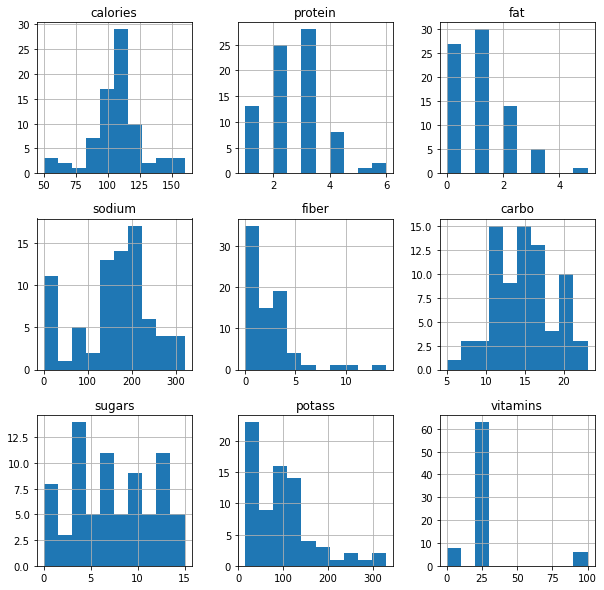

In [28]:
cereals2.hist(figsize =(10,10))

#### Grafico de la data en cubo (Perspectiva tridimensional)

/usr/local/lib/python3.7/dist-packages/hypertools/tools/format_data.py:140: UserWarning:

Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)



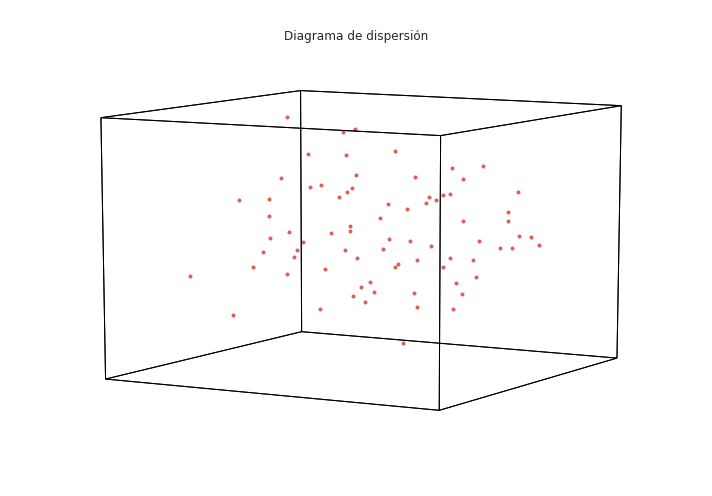

In [30]:
geo = hyp.plot(cereals, '.', size=[10,7], title = 'Diagrama de dispersión')

### CLUSTERING

Esta parte la comenzamos, partiendo el análisis desde los cluster jerárquicos, analizando especificamente su dendrograma para tener una idea del numero de clusters a emplear en el análsis.

In [50]:
cereal_np = cereal_norm.to_numpy()

Definicion de la funcion para evalur un dendrograma

In [52]:
def dendrogram(data, method, y):
    '''Function to create dendrogram.
       Takes data, the hierarchical method to use, and the y axis to draw the line.'''
    fig = plt.figure(figsize=(9,6))
    plt.title("Dendrograms with {} method".format(method))
    dend = shc.dendrogram(shc.linkage(data, method=method))
    plt.axhline(y=y, color='r', linestyle='--')   

#### Dendrograma

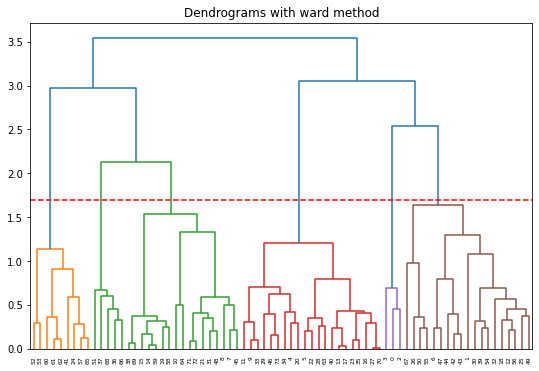

In [53]:
dendrogram(cereal_np,'ward', 1.7)

Como se puede ver, cada cereal comienza como su propio grupo y luego se vincula con el siguiente basado en el método o vínculo elegido, construyendo la jerarquía hasta la cima. Para encontrar el óptimo
número de conglomerados, se utiliza la distancia en el eje y que representa la disimilitud. uno debe dibujar
una línea a través del dendrograma donde la línea puede moverse hacia arriba y hacia abajo la distancia más larga antes
encontrar un punto de unión. El número de líneas por las que pasa este corte representa el valor óptimo
número de agrupaciones. Para los datos de cereales, la línea roja se dibuja a través de seis líneas, lo que da como resultado seis grupos como se muestra en los diferentes colores en la figura.
Entonces de acuerdo a lo expresado por el dendrograma, dicho grafico sugiere un numero de 6 cluster dentro de nuestra data, por lo que dicho numero sera el empleado como referencia de contraste  con el calculo de clusters por k-means.

####Definicion de la funciones de calculo
Prueba del codo K-MEANS

In [31]:
def compute_SSE(data, n):
    '''
    function to compute see by testing different values of k clusters
    takes data and number of clusters as arguements
    '''
    sse = {}
    for k in range(1,n+1):   
        # run KMeans function with number of clusters to create, maximum iterations to perform, and apply the data with fit
        km = KMeans(n_clusters=k, max_iter=1000).fit(data)
        # inertia_ is KMeans attribute that is the value of the sum of squared distances of sample to closest cluster center
        sse[k]=km.inertia_
    return(sse)



def format_SSE(sse_values):
    '''
    function to print clusters and SSE value
    takes compute_SSE function as an argument
    '''
    print('Clusters and their SEE Value')
    print('-'*40)
    for k,v in sse_values.items():        
        print('Clusters: {} \tSSE: {}'.format(k,v))
        


def compute_elbow(sse):
    '''
    function to compute the elbow graph with the sse argument
    '''
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared errors')
    plt.title('Elbow Test: SSE vs. Number of Clusters')
    plt.show()

#### Depuracion de la data

Sin embargo antes del inicio del calculo del numero de clusters por el metrodo del codo, realizamos una depueracion de la data de posibles valores NA que pudieran afectar neustros calculos de analisis.

In [36]:
cereal_norm.isnull().sum().sum()

4

In [37]:
cereal_norm = cereal_norm.dropna()

####Prueba del codo K-MEANS

Para determinar el numero adecuados de clusters se empleoa en el k-means el grafico del codo,la prueba del codo o grafico de codos produce
un gráfico, valga la redundancia, que tiene una ligera curva en seis grupos. Este es el número de conglomerados que se utiliza en el análisis de conglomerados de Kmeans.

Clusters and their SEE Value
----------------------------------------
Clusters: 1 	SSE: 32.68814439448919
Clusters: 2 	SSE: 25.820650133784945
Clusters: 3 	SSE: 21.006253003397195
Clusters: 4 	SSE: 17.27744020014423
Clusters: 5 	SSE: 14.075457498353039
Clusters: 6 	SSE: 11.639789707433298
Clusters: 7 	SSE: 10.36761014563744
Clusters: 8 	SSE: 9.31431010736939
Clusters: 9 	SSE: 8.414591717286402
Clusters: 10 	SSE: 7.511681975462878


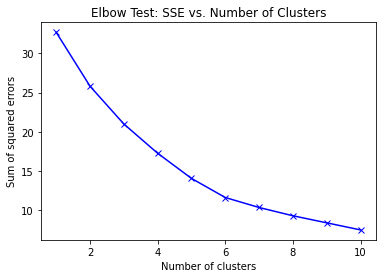

In [38]:
k = 10

sse_value = compute_SSE(cereal_norm, k)
format_SSE(sse_value)
compute_elbow(sse_value)

Con dichos 6 valorres, se colocan estos dentro algoritmo del kmeans para realizar la agrupación

#### K-means

In [55]:
kmeans = KMeans(n_clusters=6).fit(cereal_norm)

In [56]:
kmeans_norm_labels = pd.DataFrame(kmeans.labels_)

In [57]:
labeled_cereal = pd.concat((cereals, kmeans_norm_labels), axis=1)
labeled_cereal = labeled_cereal.rename({0: 'kmeans_norm_labels'}, axis=1)

In [58]:
labeled_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,kmeans_norm_labels
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,3.0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,5.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,3.0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,3.0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,0.0


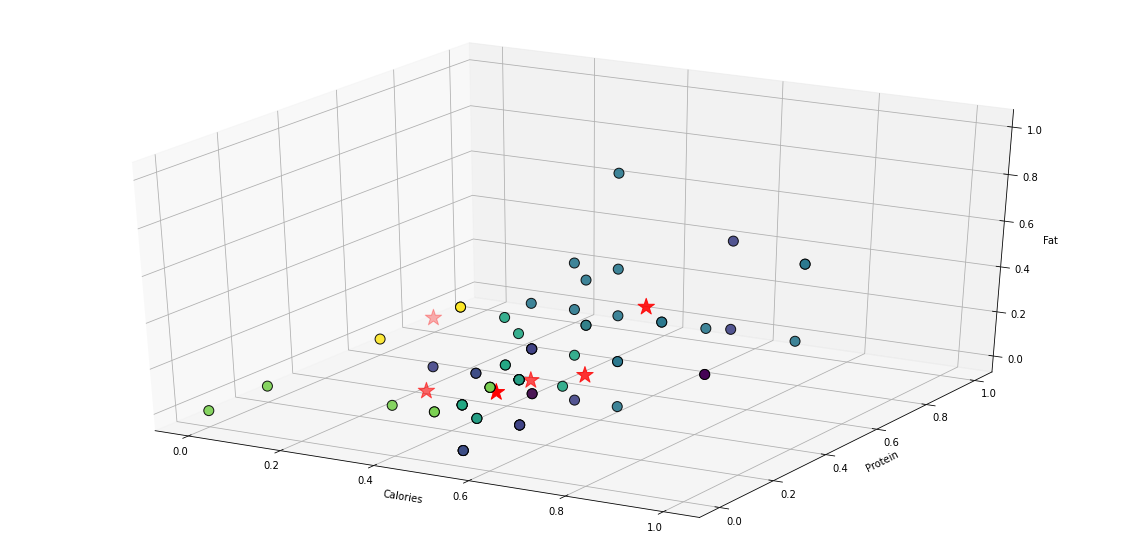

In [59]:
kmeans_ = KMeans(n_clusters=6)
# fit the data
y_kmeans_ = kmeans_.fit_predict(cereal_np)

# plot the k-means clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cereal_np[:,0],cereal_np[:,1],cereal_np[:,2],
          c=y_kmeans_, cmap='viridis',
          edgecolor='k', s=100, alpha=0.9)
#ax.set_title("First three directions")
ax.set_xlabel("Calories")
ax.set_ylabel("Protein")
ax.set_zlabel("Fat")
ax.dist = 10

ax.scatter(kmeans_.cluster_centers_[:,0],kmeans_.cluster_centers_[:,1],kmeans_.cluster_centers_[:,2],
          s=300, c='r', marker='*', label='Centroid')

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

PRECISION DEL MODELO 

El objetivo del agrupamiento no supervisado es diferenciar los puntos lo mejor posible. A evaluar los grupos y probar la precisión del método K-means, la puntuación de la silueta fue realizado. 

Silohuette Test - Rendimiento de los clusters

In [39]:
sil_score = {}
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(cereal_norm)
    
    silhouette_avg = silhouette_score(cereal_norm, cluster_labels)
    
    sil_score[n_clusters] = silhouette_avg

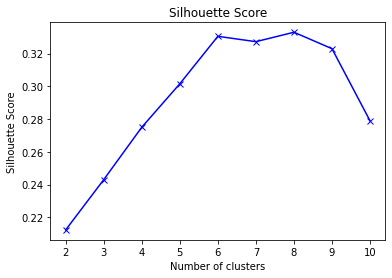

In [40]:
# plot silhouette score

plt.figure()
plt.plot(list(sil_score.keys()), list(sil_score.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

La gráfica del coeficiente de silueta muestra la “cercanía de cada punto en un
clúster tiene con respecto a los otros puntos en los clústeres vecinos”. 
Sus Puntuaciones pueden ser de 0 a 1, y están segmentados en cuatro rangos de precisión: excelente, razonable, débil,
y no se ha encontrado agrupación.
Mirando la puntuación de silueta para el cereal, nuestro conjunto de datos, el número más cercano a 1 es el número óptimo de grupos. Como se ve en la figura, 6 clústeres muestran la puntuación más alta más cercana a 1, que fue el número de clústeres utilizados de la
prueba de codo Sin embargo, la puntuación de seis grupos está cerca de 0,32, este cae dentro de la categoría débil (rango de 0.26-0.50), lo que significa que la calidad de los grupos no es muy
de confianza

## 2.2 N° de sleeccion de clusters

Se seleccionarian un total de 6 clusters.

### 2.3 Como se abordaria un problema sin normalizacion 